In [151]:
%matplotlib inline
import pyfolio as pf

import pytz

from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import load_from_yahoo
from zipline.finance import commission

zipline_logging = logbook.NestedSetup([
    logbook.NullHandler(level=logbook.DEBUG),
    logbook.StreamHandler(sys.stdout, level=logbook.INFO),
    logbook.StreamHandler(sys.stderr, level=logbook.ERROR),
])
zipline_logging.push_application()


In [106]:
import pandas as pd
t1=pd.to_datetime("2000-1-1",format="%Y-%m-%d")
t2=pd.to_datetime("2000-1-2",format="%Y-%m-%d")
d = {'stock_symbol': ('BANANA','AAPL'), 'stock_date': (t1,t2)}
df = pd.DataFrame(data=d, index={0,1})
df.stock_date[df.stock_symbol=='AAPL']
df.ix[0].stock_date
len(df)
type(df.ix[1].stock_symbol)

str

In [148]:
# %load_ext zipline # first version code
import sys
import logbook
import numpy as np
from datetime import datetime
import pytz

from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import load_from_yahoo
from zipline.finance import commission

In [149]:
# %%zipline --start 2000-1-1 --end 2002-1-1 # first version code
zipline_logging = logbook.NestedSetup([
    logbook.NullHandler(level=logbook.DEBUG),
    logbook.StreamHandler(sys.stdout, level=logbook.INFO),
    logbook.StreamHandler(sys.stderr, level=logbook.ERROR),
])
zipline_logging.push_application()

STOCKS = ['AMD', 'CERN', 'COST', 'DELL', 'XOM', 'AAPL', 'MSFT']

import pandas as pd

from zipline.api import symbol, order, record

actual_time=0
def initialize(context):
    context.count=0
    t1=pd.to_datetime("2000-1-5",format="%Y-%m-%d")
    t2=pd.to_datetime("2000-1-6",format="%Y-%m-%d")
    t3=pd.to_datetime("2000-1-7",format="%Y-%m-%d")
    d = {'stock_symbol': ('XOM','AAPL','MSFT'), 'stock_date': (t1,t2,t3),'quantity':(10,-20,200)}
    df = pd.DataFrame(data=d, index={0,1,2})
#     df.stock_date[df.stock_symbol=='AAPL']
#     df.ix[0].stock_date
    context.df=df
    print()

def handle_data(context, data):
    symb=context.df.ix[context.count].stock_symbol
    if(context.count<len(context.df)):
        actual_time = data.current(symbol(symb), "last_traded")
        actual_time =actual_time.tz_localize(None)
        if (context.df.ix[context.count].stock_date==actual_time):
            print(context.count,context.df.ix[context.count].stock_date,\
                  context.df.ix[context.count].stock_symbol,context.df.ix[context.count].quantity)
            order(symbol(symb), int(context.df.ix[context.count].quantity))
            record(Count=context.count,Date=context.df.ix[context.count].stock_date,\
                   Security_Price=data[symbol(symb)].price)
            if(context.count<len(context.df)-1):
                context.count+=1
                
start = datetime(2000, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2004, 1, 1, 0, 0, 0, 0, pytz.utc)

# Load price data from yahoo.
data = load_from_yahoo(stocks=STOCKS, indexes={}, start=start, end=end)
data = data.dropna()

# Create and run the algorithm.
olmar = TradingAlgorithm(handle_data=handle_data, initialize=initialize)
results = olmar.run(data)
    

[2017-03-29 01:52:19.226846] INFO: Loader: Loading stock: AMD
[2017-03-29 01:52:19.501049] INFO: Loader: Loading stock: CERN
[2017-03-29 01:52:19.625853] INFO: Loader: Loading stock: COST
[2017-03-29 01:52:19.759105] INFO: Loader: Loading stock: DELL
[2017-03-29 01:52:19.888672] INFO: Loader: Loading stock: XOM
[2017-03-29 01:52:20.005945] INFO: Loader: Loading stock: AAPL
[2017-03-29 01:52:35.219810] INFO: Loader: Loading stock: MSFT

0 2000-01-05 00:00:00 XOM 10
1 2000-01-06 00:00:00 AAPL -20
2 2000-01-07 00:00:00 MSFT 200


/home/saeed/anaconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:36: ZiplineDeprecationWarning: `data[sid(N)]` is deprecated. Use `data.current`.


[2017-03-29 01:52:47.165866] INFO: Performance: Simulated 1004 trading days out of 1004.
[2017-03-29 01:52:47.166889] INFO: Performance: first open: 2000-01-03 14:31:00+00:00
[2017-03-29 01:52:47.169472] INFO: Performance: last close: 2003-12-31 21:00:00+00:00


In [152]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [160]:
results.head()

,Count,Date,Security_Price,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2000-01-03 00:00:00+00:00,NaN,NaT,NaN,NaN,0.000000,NaN,-0.009549,NaN,NaN,0.00000,...,0.00000,0.00000,0,NaN,100000.00000,0.00000,0.00000,1,[],0.0658
2000-01-04 00:00:00+00:00,NaN,NaT,NaN,0.000000,0.000000,0.000000,-0.047528,0.323229,0.000000,0.00000,...,0.00000,0.00000,0,NaN,100000.00000,0.00000,0.00000,2,[],0.0649
2000-01-05 00:00:00+00:00,0.0,2000-01-05,26.472112,0.000000,0.000000,0.000000,-0.045697,0.329321,0.000000,0.00000,...,0.00000,0.00000,0,NaN,100000.00000,0.00000,0.00000,3,[],0.0662
2000-01-06 00:00:00+00:00,1.0,2000-01-06,3.077039,0.000079,-0.000010,-0.000957,-0.044785,0.298325,-0.000115,-279.40655,...,0.00000,0.00000,0,-7.937254,100000.00000,0.00000,0.00000,4,[{'order_id': 'b741f4e32df6485f8b7169cc93edc4d...,0.0657
2000-01-07 00:00:00+00:00,2.0,2000-01-07,37.605172,0.000131,-0.000028,-0.001663,-0.018908,0.375301,-0.000270,63.45588,...,-64.45588,-64.45588,1,-9.642530,99720.59345,278.40655,278.40655,5,[{'order_id': '9ae918b607a5493ba2db4e1624265d0...,0.0652


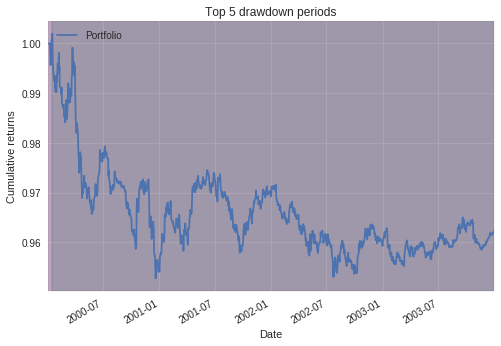

In [153]:
pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')

Entire data start date: 2000-01-03
Entire data end date: 2003-12-31


Out-of-Sample Months: 47
Backtest Months: 0


Performance statistics,All history,Backtest,Out of sample
annual_return,-0.01,nan,-0.01
cum_returns_final,-0.04,nan,-0.04
annual_volatility,0.02,nan,0.02
sharpe_ratio,-0.48,nan,-0.48
calmar_ratio,-0.20,nan,-0.20
stability_of_timeseries,0.50,nan,0.50
max_drawdown,-0.05,nan,-0.05
omega_ratio,0.92,nan,0.92
sortino_ratio,-0.64,nan,-0.64
skew,-0.78,nan,-0.78


TypeError: Empty 'DataFrame': no numeric data to plot

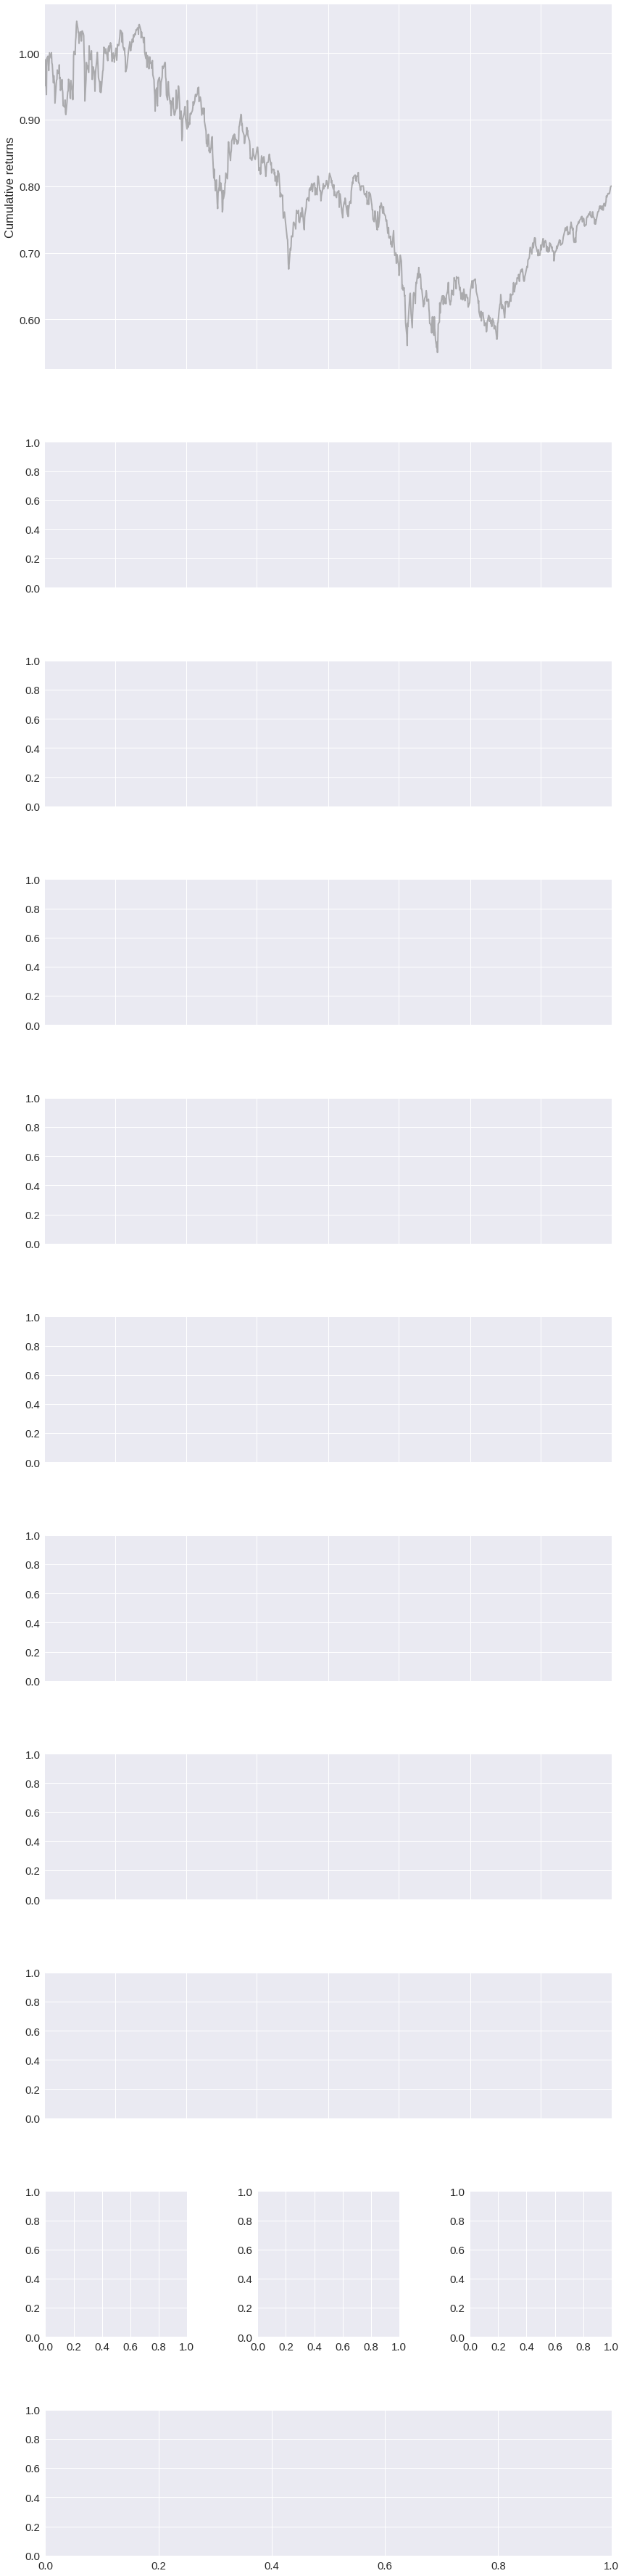

In [157]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions,
                          live_start_date='2000-1-01', round_trips=True)